1.0 导入包

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_utils import load_dataset

1.1 Visualizing the dataset

train_X shape:  (12, 1)
train_y shape:  (12, 1)


Text(0, 0.5, 'Water flowing out of the dam (y)')

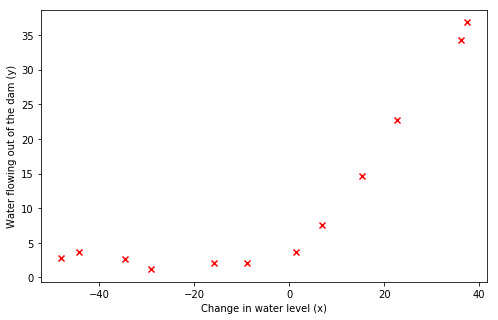

In [2]:
train_X, train_y, Xval, yval, Xtest, ytest = load_dataset()
print('train_X shape: ', train_X.shape)
print('train_y shape: ', train_y.shape)
plt.figure(figsize=(8, 5))
plt.scatter(train_X, train_y, c='r',marker='x')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

1.2 Regularized linear regression cost function

In [41]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

tf.set_random_seed(1)  # so that your "random" numbers match ours

# Set model weights
W = tf.Variable(tf.random_normal((1,1)), name="weight")
b = tf.Variable(3.0, name="bias")
# Construct a linear model
pred = tf.add(tf.matmul(X, W), b)  # (12, 1)  (1, 1)  (12, 1)
print(pred)
# Y = WX + b

Tensor("Add_4:0", shape=(?, 1), dtype=float32)


In [42]:
def model(train_X, train_y, learning_rate=0.001, lambd=0.1,
          num_epochs=1500, print_cost=True):
    costs = []
    m, n= train_X.shape
    print(m, n)
    cost = tf.reduce_sum(tf.square(pred - train_y))/ (2 * m)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        # J = sess.run(cost, feed_dict={X: train_X, Y: train_y})
        # print(J)
        for epoch in range(num_epochs):
            _, epoch_cost = sess.run([optimizer, cost], feed_dict={X:train_X, Y:train_y})
            # Print the cost every epoch
            if lambd != 0.0:
                re_cost = sess.run(tf.contrib.layers.l2_regularizer(lambd)(W))
                epoch_cost = epoch_cost + re_cost
            if epoch % 100 == 0 and print_cost == True:
                print("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
        return costs, W.eval(), b.eval()

12 1


Cost after epoch 0: 602.205078
Cost after epoch 100: 62.953468
Cost after epoch 200: 55.797771
Cost after epoch 300: 49.903900
Cost after epoch 400: 45.049328


Cost after epoch 500: 41.050816
Cost after epoch 600: 37.757362
Cost after epoch 700: 35.044689
Cost after epoch 800: 32.810360


Cost after epoch 900: 30.970028
Cost after epoch 1000: 29.454220
Cost after epoch 1100: 28.205694
Cost after epoch 1200: 27.177322


Cost after epoch 1300: 26.330311
Cost after epoch 1400: 25.632656


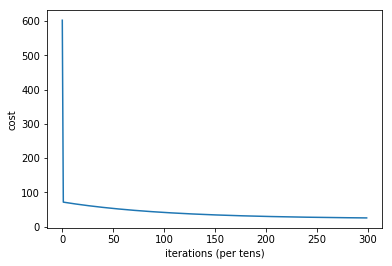

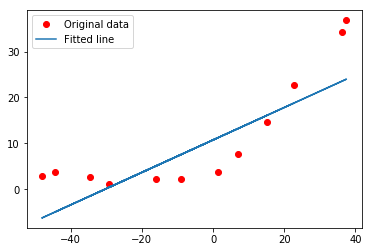

In [43]:
#  Fitting linear regression 拟合线性回归
costs, W, b = model(train_X, train_y, lambd=0.0)
# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

plt.plot(train_X, train_y, 'ro', label='Original data')
plt.plot(train_X, W * train_X + b, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
def plot_learning_curve(X, y, Xval, yval, l):
    """画出学习曲线，即交叉验证误差和训练误差随样本数量的变化的变化"""
    pass
    # xx = range(1, len(X) + 1)  # at least has one example 
    # training_cost, cv_cost = [], []
    # training_cost = model(X, y, l)
    # cv_cost_i = costReg(res, Xval, yval, 0)
    # cv_cost.append(cv_cost_i)
    #     
    # plt.figure(figsize=(8,5))
    # plt.plot(xx, training_cost, label='training cost')  
    # plt.plot(xx, cv_cost, label='cv cost') 
    # plt.legend()
    # plt.xlabel('Number of training examples')
    # plt.ylabel('Error')
    # plt.title('Learning curve for linear regression')
    # plt.grid(True)